## Making A Neural Network in Python

We Modeled a Neural Network in the previous posts. Now lets make a neural network we have worked out a model for how all the processes are modeled which include
- ### Structue
- ### BackPropagation
- ### Gradient Descent

In [6]:
class Neural_Network:
    # intialize the neural network
    def __init__(self,inodes,hnodes,onodes,lr):
        self.inodes = inodes
        self.hnodes = hnodes
        self.onodes = onodes
        
        # learning rate
        # We use learning rate to moderate how much each signal should effect the network
        self.lr = lr
              
    # train the neural network
    def train(self):
        pass
    
    # Query the neural network    
    def query(self,inputs):
        pass

In [7]:
i_nodes = 3
h_nodes = 3
o_nodes = 3

learning_rate = 0.3

In [12]:
nn = Neural_Network(i_nodes,h_nodes,o_nodes,learning_rate)

We will first make a general structure of our neural netework by making a class Neural Network with given amounts of  input, hidden, output nodes and learning rate as parameters. 

#### We will import scipy and get the sigmoid activation function from scipy.special

In [3]:
import scipy.special
import numpy as np

In [9]:
activation = lambda x:scipy.special.expit(x)

We also have to intilize the weights of the input_hidden and hidden_output layers, We are subtracting 0.5 to get values in -ve since neural network should have weights between + 1 and -1 

In [10]:
# Weights from input to hidden
weights_input_hidden  = np.random.rand(i_nodes,h_nodes) - 0.5
print(weights_input_hidden)
print(weights_input_hidden.shape)

# Weights from hidden to output 
weights_hidden_output = np.random.rand(h_nodes,o_nodes) - 0.5
print(weights_hidden_output)
print(weights_hidden_output.shape)

[[-0.34996344 -0.31322347  0.07289378]
 [ 0.29926373  0.19951762 -0.23887961]
 [ 0.12863304  0.4357355   0.04768806]]
(3, 3)
[[ 0.03025737  0.30678867 -0.20588533]
 [-0.06332789  0.07617471  0.34011758]
 [-0.45037221 -0.4314841  -0.07300812]]
(3, 3)


Just like we defined earlier the dimensions of the connections of weights is alright.

#### Our Class now looks something like this

In [11]:
class Neural_Network:
    # intialize the neural network
    def __init__(self,inodes,hnodes,onodes,lr):
        self.inodes = inodes
        self.hnodes = hnodes
        self.onodes = onodes
        
        # learning rate
        # We use learning rate to moderate how much each signal should effect the network
        self.lr = lr
        
        # Weights from input to hidden
        self.weights_input_hidden  = np.random.rand(self.inodes,self.hnodes) - 0.5
        # Weights from hidden to output 
        self.weights_hidden_output = np.random.rand(self.hnodes,self.onodes) - 0.5 
 
        # Our Sigmoid activation function
        self.activation = lambda x:scipy.special.expit(x)
              
    # train the neural network
    def train(self):
        pass
    
    # Query the neural network    
    def query(self,inputs):
        pass

#### Now we can go to the train function but first lets query the results and see how we can give inputs and use the weights to predict the output.

The query() function takes the input to a neural network and returns the network's output. That's simple enough, but to do that you'll remember that we need to pass the input signals from the input layer of nodes, through the hidden layer and out of the final output layer. You'll also remember that we use the link weights to moderate the signals as they feed into any given hidden or output node, and we also use the sigmoid activation function to squish the signal coming out of those nodes.

The following shows how the link weights between hidden and input are used to input the hidden layer.

                       X_hidden = W_hidden_input.I

In [13]:
hidden_inputs = np.dot(weights_input_hidden,inputs)

NameError: name 'inputs' is not defined

Its then passed on the sigmoid function.

                      O_hidden=sigmoid(X_hidden)

In [15]:
hidden_outputs = activation(hidden_inputs)

NameError: name 'hidden_inputs' is not defined

Now we need to do the same for the hidden_output weights and input from hidden layer which is moderated by the sigmoid function. Now the Code look something like this, we have completed our query function.

In [29]:
import numpy as np

class Neural_Network:
    # intialize the neural network
    def __init__(self,inodes,hnodes,onodes,lr):
        self.inodes = inodes
        self.hnodes = hnodes
        self.onodes = onodes
        
        # learning rate
        # We use learning rate to moderate how much each signal should effect the network
        self.lr = lr
        
        # Weights from input to hidden
        self.weights_input_hidden  = np.random.rand(self.inodes,self.hnodes) - 0.5
        # Weights from hidden to output 
        self.weights_hidden_output = np.random.rand(self.hnodes,self.onodes) - 0.5 
 
        # Our Sigmoid activation function
        self.activation = lambda x:scipy.special.expit(x)
        
    # train the neural network
    def train(self):
        pass
    
    # Query the neural network    
    def query(self,inputs):
        # Calculate signal into the hidden layer
        hidden_inputs = np.dot(self.weights_input_hidden, inputs)
        # Moderate the output using activation function and output the signal
        hidden_outputs = self.activation(hidden_inputs)
        
        # Calculate signal into the final output layer
        final_inputs = np.dot(self.weights_hidden_output, hidden_outputs)
        # Moderate the output using activation function and output the signal
        final_outputs = self.activation(final_inputs)
        return final_outputs 

### Training the Network
Let's now tackle the slightly more involved training task. There are two parts to this:

- ##### The first part is working out the output for a given training example. That is no different to what we just did with the query() function.

- ##### The second part is taking this calculated output, comparing it with the desired output, and using the difference to guide the updating of the network weights.

We've already done the first part so let's write that out:

In [29]:
# train the neural network 
def train (self, inputs_list, targets_list):
    # convert inputs list to 2d array 
    inputs = numpy.array (inputs_list, ndmin=2).T
    targets = numpy.array (targets_list, ndmin=2).T
    
    # calculate signals into hidden layer 
    hidden_inputs = numpy.dot (self.weights_input_hidden, inputs) # calculate the signals emerging from hidden layer 
    hidden_outputs = self.activation(hidden_inputs)
    
    # calculate signals into final output layer 
    final_inputs = numpy.dot(self.weights_hidden_output, hidden_outputs) # calculate the signals emerging from final output layer 
    final_outputs = self.activation(final_inputs)
    
    pass

The code also turns the targets list into a numpy array, just as the inputs list is turned into a numpy array.

In [18]:
targets = numpy.array (targets list, ndmin=2).T

SyntaxError: invalid syntax (999015782.py, line 1)

Now we're getting closer to the heart of the neural network's working, improving the weights based on the error between the calculated and target output.

Let's do this in gentle manageable steps.

First we need to calculate the error, which is the difference between the desired target output provided by the training example, and the actual calculated output. That's the difference between the matrices (targets - final_outputs) done element by element. The Python code for this is really simple, showing again the elegant power of matrices.

In [19]:
output_errors = target - final_outputs

NameError: name 'target' is not defined

We can calculate the back-propagated errors for the hidden layer nodes. Remember how we split the errors according to the connected weights, and recombine them for each hidden layer node. We worked out the matrix form of this calculation as

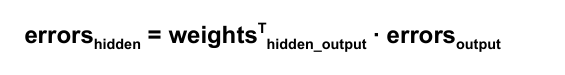

Lets look at the code for this in python.

In [21]:
# hidden layer error is the output_errors, split by weights, recombined at hidden nodes 
hidden_errors = numpy.dot(self.weights_hidden_output.T, output errors)

SyntaxError: invalid syntax (2858053769.py, line 2)

We can use this expression to update the weights

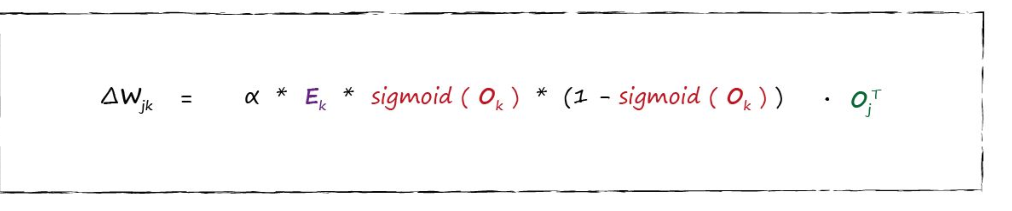

In [ ]:
# update the weights for the links between the hidden and output layers 
self.weights_hidden_output += self.lr * numpy.dot ((output errors * final outputs * (1.0 - final_outputs)),
                                                   / numpy.transpose(hidden_outputs))
# update the weights for the links between the input and hidden layers
self.weights_input_hidden  += self.lr * numpy.dot ((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),
                                                   / numpy.transpose(inputs)).

Thats it here we have our updated Code.Next we will look into using the mnist dataset on this neural network.

In [27]:

class Neural_Network:
    # intialize the neural network
    def __init__(self,inodes,hnodes,onodes,lr):
        self.inodes = inodes
        self.hnodes = hnodes
        self.onodes = onodes
        
        # learning rate
        # We use learning rate to moderate how much each signal should effect the network
        self.lr = lr
        
        # Weights from input to hidden
        self.weights_input_hidden  = np.random.rand(self.inodes,self.hnodes) - 0.5
        # Weights from hidden to output 
        self.weights_hidden_output = np.random.rand(self.hnodes,self.onodes) - 0.5 
 
        # Our Sigmoid activation function
        self.activation = lambda x:scipy.special.expit(x)
        
     # train the neural network 
    def train (self, inputs_list, targets_list):
        # convert inputs list to 2d array 
        inputs = numpy.array (inputs_list, ndmin=2).T
        targets = numpy.array (targets_list, ndmin=2). T

        # calculate signals into hidden layer 
        hidden_inputs = numpy.dot (self.weights_input_hidden, inputs) # calculate the signals emerging from hidden layer 
        hidden_outputs = self.activation(hidden_outputs)

        # calculate signals into final output layer 
        final_inputs = numpy.dot (self.weights_hidden_output, hidden_outputs) # calculate the signals emerging from final output layer 
        final_outputs = self.activation(final_inputs)
        
        # output layer error is the (target - actual) 
        output_errors = targets - final_outputs
        # hidden layer error is the output errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot (self.weights_hidden_output.T, output_errors)
        # update the weights for the links between the hidden and output layers
        self.weights_hidden_output += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose (hidden_outputs) )
        # update the weights for the links between the input and hidden layers
        self.weights_input_hidden += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose (inputs))
        pass
    
    # Query the neural network    
    def query(self,inputs):
        # Calculate signal into the hidden layer
        hidden_inputs = np.dot(self.weights_input_hidden, inputs)
        # Moderate the output using activation function and output the signal
        hidden_outputs = self.activation(hidden_inputs)
        
        # Calculate signal into the final output layer
        final_inputs = np.dot(self.weights_hidden_output, hidden_outputs)
        # Moderate the output using activation function and output the signal
        final_outputs = self.activation(final_inputs)
        return final_outputs 



In [34]:
nn = Neural_Network(i_nodes,h_nodes,o_nodes,learning_rate)

In [35]:
nn.query([1.1,-2,-3])

array([0.46882802, 0.5797888 , 0.13216093])